## Ensemble Model: Stacking

In [119]:
# Import necessary libraries
import pickle
import pandas as pd
import matplotlib.pyplot as plt

from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

### Data Preparation

In [120]:
df = pickle.load(open('../common/df.p', 'rb'))
df = df.iloc[:50] # For testing purposes
feature = 'cpu_usage'
# Split data into train and test sets 80:20
train_size = int(len(df) * 0.8)
train_cpu, test_cpu = df[feature].iloc[:train_size], df[feature].iloc[train_size:]

### Models Creation Functions & Utilities

In [121]:
def auto_select_arima(X):
    model = auto_arima(X, seasonal=False, trace=True, error_action="ignore", suppress_warnings=True, stepwise=True)
    return model

In [122]:
def train_arima(series, order=(1,1,1)):
    """
    Train an ARIMA model on a given time series.
    
    Parameters:
    - series: Pandas Series object representing the time series data.
    - order: A tuple representing the (p,d,q) parameters for ARIMA.
    
    Returns:
    - model_fit: The trained ARIMA model.
    """
    model = ARIMA(series, order=order)
    model_fit = model.fit()
    return model_fit

### Models Creation

In [123]:
cpu_auto_arima = auto_select_arima(train_cpu)
print(cpu_auto_arima.summary())

Performing stepwise search to minimize aic


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-72.378, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-64.582, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-70.677, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-77.696, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-66.507, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-75.696, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-75.696, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-78.021, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-76.037, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-76.045, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-72.382, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.32 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.930 seconds
                               SARIMAX Results                                
Dep. Va

In [124]:
cpu_arima_model = train_arima(train_cpu, (5,1,0))

c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 5S will be used.
  self._init_dates(dates, freq)
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 5S will be used.
  self._init_dates(dates, freq)
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 5S will be used.
  self._init_dates(dates, freq)


### Models Prediction

In [125]:
### ARIMA - CPU Usage
cpu_arima_forecast = cpu_arima_model.forecast(steps=len(test_cpu))

### Visualization

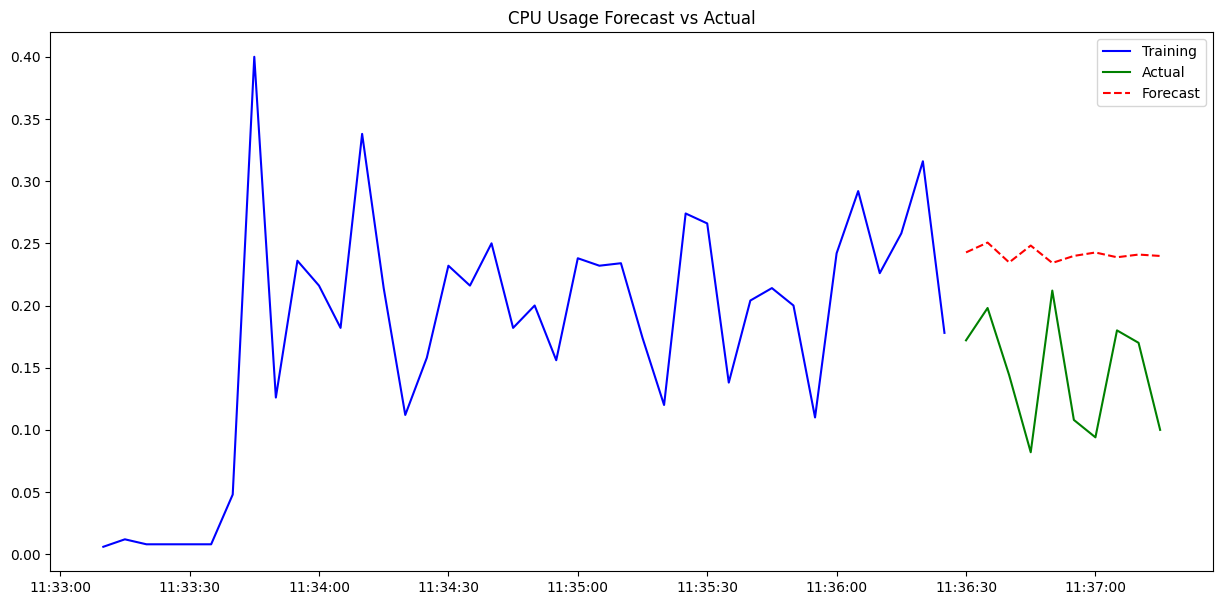

In [126]:
### ARIMA - CPU Usage

plt.figure(figsize=(15,7))

# Plotting training data
plt.plot(train_cpu.index, train_cpu, label='Training', color='blue')

# Plotting actual test data
plt.plot(test_cpu.index, test_cpu, label='Actual', color='green')

# Plotting forecast
plt.plot(test_cpu.index, cpu_arima_forecast, label='Forecast', color='red', linestyle='--')

plt.title('CPU Usage Forecast vs Actual')
plt.legend()
plt.show()